#### Friday, 12 JUL 2024

In [35]:
!pip install feature-engine

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.discretisation import DecisionTreeDiscretiser

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
data = pd.read_csv('/content/drive/MyDrive/Feature Engineering/boston.csv')

In [39]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [40]:
disc = EqualWidthDiscretiser(bins=10, variables = ['DIS'])
disc.fit(data)
data = disc.transform(data)

In [41]:
print(disc.binner_dict_)

{'DIS': [-inf, 2.2292899999999998, 3.32898, 4.42867, 5.52836, 6.62805, 7.727740000000001, 8.82743, 9.92712, 11.026810000000001, inf]}


In [42]:
data.head() # DIS จะมี 10 ค่า {0,1,2,3,4,5,6,7,8,9,10}

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,2,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,3,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,3,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,4,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,4,3,222,18.7,396.90,5.33,36.2


In [43]:
data["DIS"].unique() # เอาไว้ตัด bin

array([2, 3, 4, 5, 6, 7, 1, 0, 8, 9])

In [44]:
# ถ้าอยากแบ่งช่วงข้อมูล ก็ใช้ pd.cut ทำการแปะ Label เพิ่มดังนี้
intervals = [0, 10, 20, 30, np.Inf]
labels = ['0-10', '10-20', '20-30', '>30']
data["lstat_labels"] = pd.cut(data["LSTAT"], bins=intervals, labels=labels, include_lowest=True)

In [45]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,lstat_labels
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,2,1,296,15.3,396.90,4.98,24.0,0-10
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,3,2,242,17.8,396.90,9.14,21.6,0-10
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,3,2,242,17.8,392.83,4.03,34.7,0-10
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,4,3,222,18.7,394.63,2.94,33.4,0-10
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,4,3,222,18.7,396.90,5.33,36.2,0-10


In [46]:
# การแบ่งช่วงสามารถใช้ Decision Tree ก็ได้ด้วยเช่นกัน (เหมือนที่เรียน Stat เมื่อเช้าเลย)
target = data["MEDV"]

In [47]:
treeDisc = DecisionTreeDiscretiser(cv=10, scoring='neg_mean_squared_error', variables=['RM'],regression=True, param_grid={'max_depth': [1,2,3,4]})
treeDisc.fit(data, target)
data = treeDisc.transform(data)

In [48]:
data.head() # RM จะมีแบ่งช่วง (Discretization) เรียบร้อยแล้ว

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,lstat_labels
0,0.00632,18.0,2.31,0,0.538,25.133333,65.2,2,1,296,15.3,396.90,4.98,24.0,0-10
1,0.02731,0.0,7.07,0,0.469,19.982470,78.9,3,2,242,17.8,396.90,9.14,21.6,0-10
2,0.02729,0.0,7.07,0,0.469,32.831579,61.1,3,2,242,17.8,392.83,4.03,34.7,0-10
3,0.03237,0.0,2.18,0,0.458,32.831579,45.8,4,3,222,18.7,394.63,2.94,33.4,0-10
4,0.06905,0.0,2.18,0,0.458,32.831579,54.2,4,3,222,18.7,396.90,5.33,36.2,0-10


In [49]:
data["RM"].unique()

array([25.13333333, 19.98247012, 32.83157895, 16.41621622, 45.89655172,
       28.7       , 30.06      , 21.9       ])

### Feature Scaling

In [50]:
import matplotlib.pyplot as plt

In [51]:
# Standardization
data["ZN"] = (data["ZN"] - data["ZN"].mean()) / (data["ZN"].std())

In [52]:
# Max-min Normalization
data["INDUS"] = (data["INDUS"]-data["INDUS"].min())/(data["INDUS"].max()-data["INDUS"].min())

ทั้ง 2 กระบวนการแค่ขยับ mean มาให้อยู่ตรงกลางเท่านั้น ไม่ได้เปลี่ยนแปลงข้อมูลอะไรมาก

### Feature Trasformation

In [53]:
 import scipy.stats as stats

 from feature_engine. transformation import PowerTransformer

In [54]:
 def diagnostic_plots(df, variable):
     plt.figure(figsize=(15,6))
     plt.subplot(1, 2, 1)
     df[variable].hist(bins=30)
     plt.subplot(1, 2, 2)
     stats.probplot(df[variable], dist="norm", plot=plt)
     plt.show()

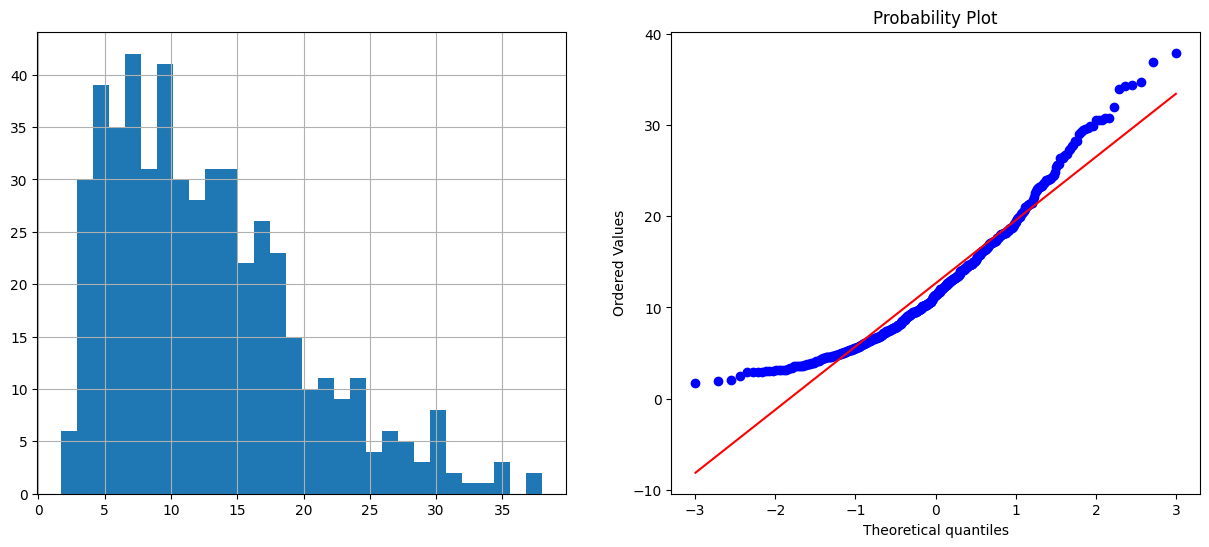

In [55]:
diagnostic_plots(data, 'LSTAT')

Perform log transformation on the LSTAT feature.

In [56]:
data['LSTAT'] = np.log(data['LSTAT'])

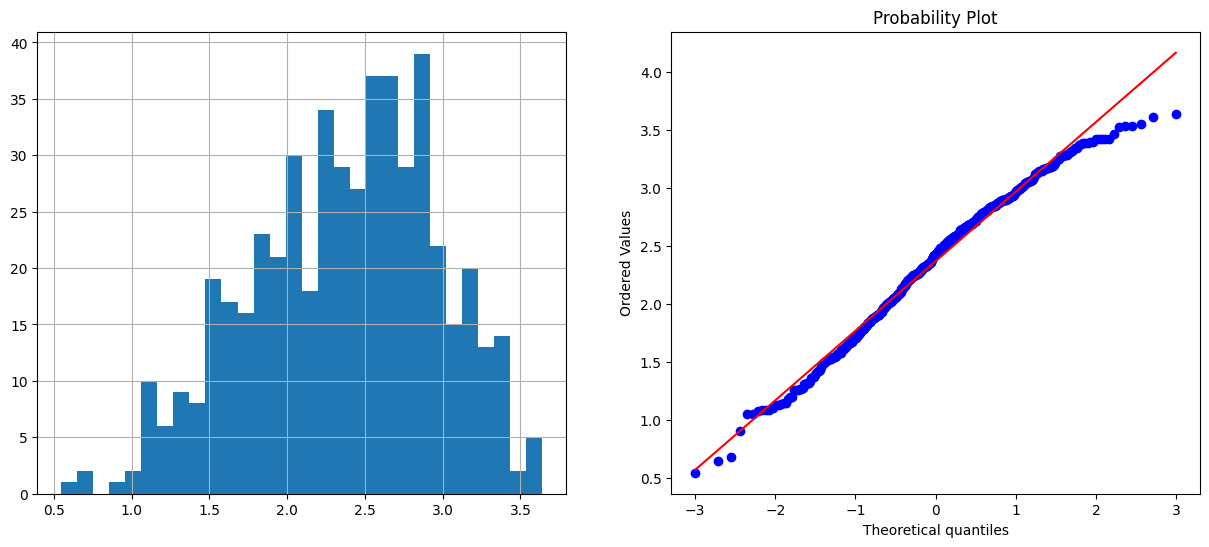

In [57]:
diagnostic_plots(data, 'LSTAT')

Perform reciprocal transformation on the LSTAT feature.

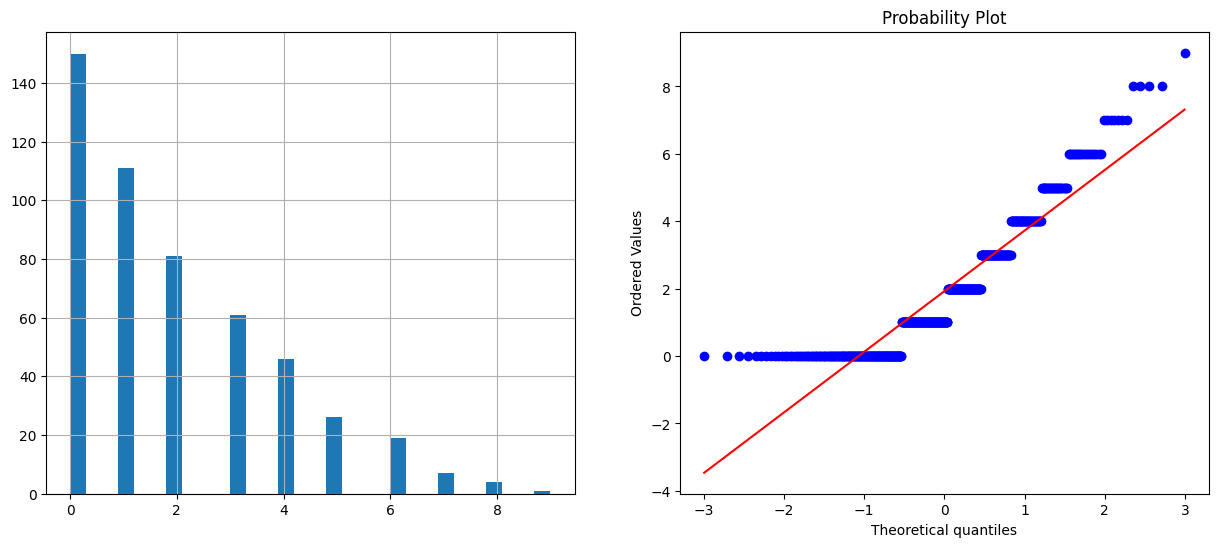

In [58]:
diagnostic_plots(data, 'DIS')

In [59]:
data['DIS'] = np.reciprocal(data['DIS'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


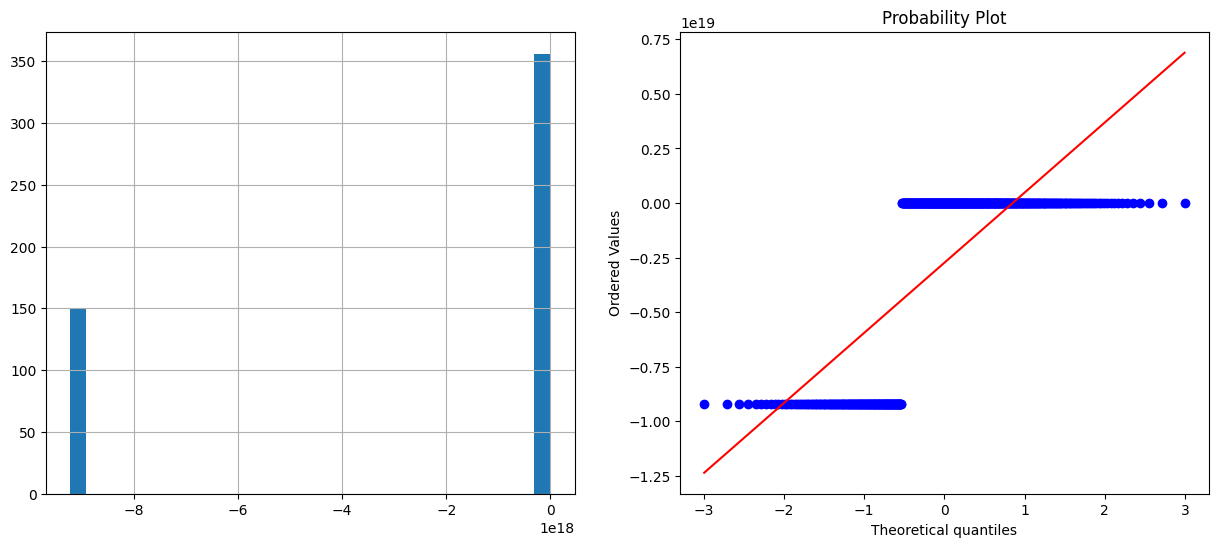

In [60]:
diagnostic_plots(data, 'DIS')

 Perform power transformation with exp = 0.3 on the NOX feature using feature-engine library.

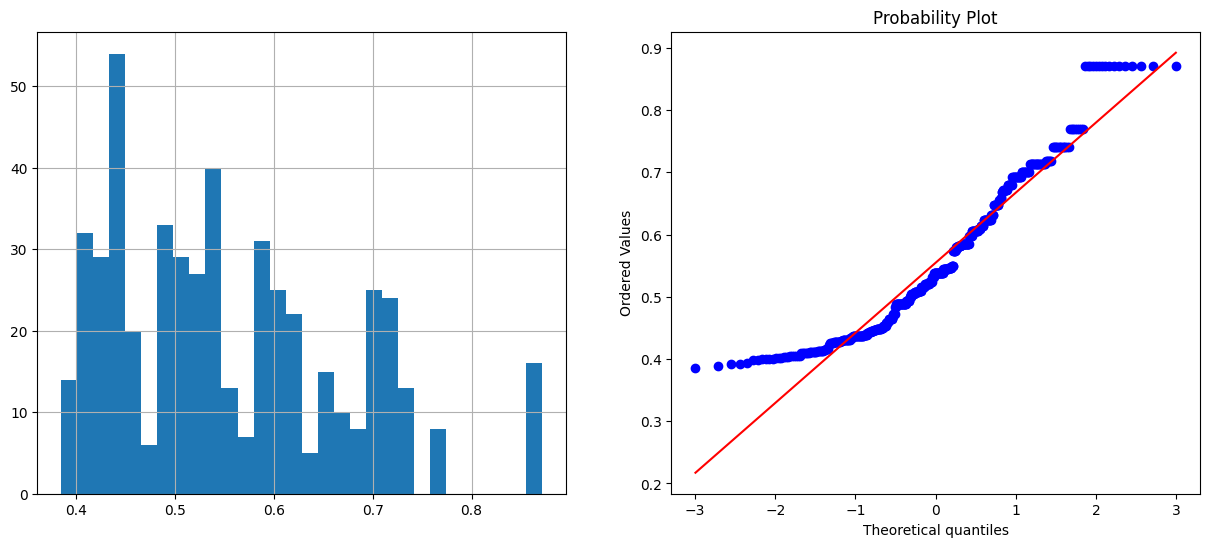

In [61]:
diagnostic_plots(data, 'NOX')

In [62]:
et = PowerTransformer(variables = ['NOX'], exp=0.3)
et.fit(data)
data = et.transform(data)

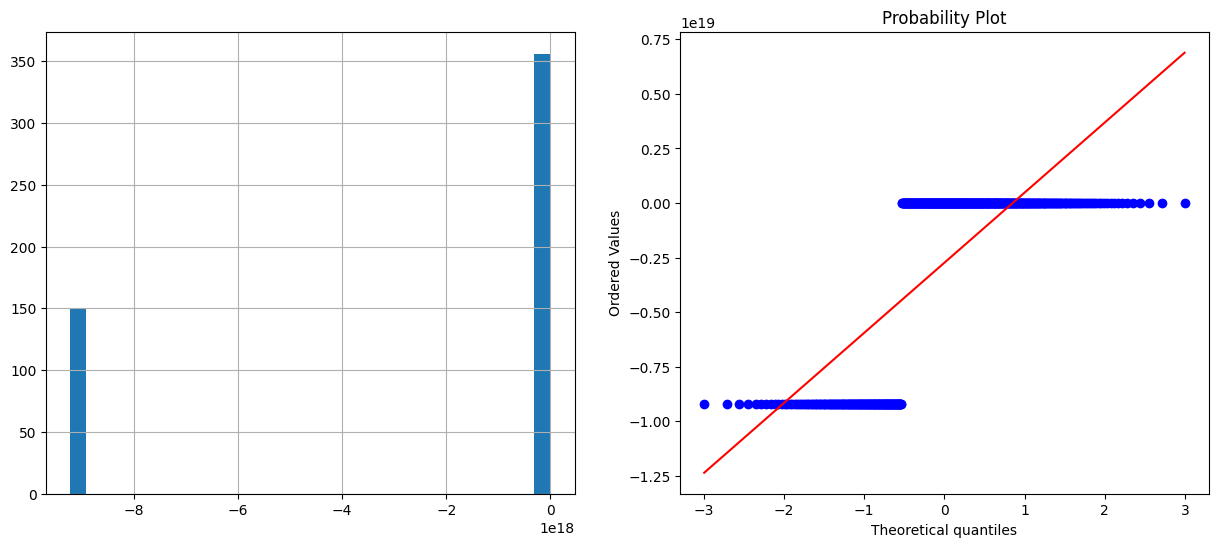

In [63]:
diagnostic_plots(data, 'DIS')

### Categorical Variable Encoding

In [72]:
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder

In [79]:
data = pd.read_csv('/content/drive/MyDrive/Feature Engineering/creditApprovalUCI.csv')

In [80]:
data = data.dropna()

In [81]:
dm_enc = OneHotEncoder(variables=["A4"], drop_last=True)
dm_enc.fit(data)
data = dm_enc.transform(data)

In [82]:
data.head()

,A1,A2,A3,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A4_u,A4_y
0,b,30.83,0.000,g,w,v,1.25,t,t,1,f,g,202.0,0,1,1,0
1,a,58.67,4.460,g,q,h,3.04,t,t,6,f,g,43.0,560,1,1,0
3,b,27.83,1.540,g,w,v,3.75,t,t,5,t,g,100.0,3,1,1,0
4,b,20.17,5.625,g,w,v,1.71,t,f,0,f,s,120.0,0,1,1,0
6,b,33.17,1.040,g,r,h,6.50,t,f,0,t,g,164.0,31285,1,1,0


ต้องลบข้อมูลสูญหายออกไปก่อน

In [ ]:
# อันนี้ไม่ต้อง Run
ohe_enc = OneHotEncoder(variables=['A4'])
ohe_enc.fit(data)
data = ohe_enc.transform(data)

In [93]:
data = pd.read_csv('/content/drive/MyDrive/Feature Engineering/creditApprovalUCI.csv')

In [94]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,NaN,u,g,q,h,NaN,NaN,NaN,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [95]:
data["A7"].unique()

array(['v', 'h', 'bb', 'ff', 'j', 'z', nan, 'o', 'dd', 'n'], dtype=object)

In [96]:
ordinal_mapping = {'v': 0, 'ff': 1, 'h': 2, 'dd': 3, 'z': 4, 'bb': 5, 'j': 6, 'Missing': 7, 'n': 8,
'o': 9}

In [97]:
data["A7"] = data["A7"].map(ordinal_mapping)

In [98]:
le = OrdinalEncoder(encoding_method='arbitrary', variables=["A7"])

In [99]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,0.0,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,2.0,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,NaN,u,g,q,2.0,NaN,NaN,NaN,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,0.0,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,0.0,1.71,t,f,0,f,s,120.0,0,1


In [101]:
data = data.head()

In [103]:
le.fit(data)

TypeError: Some of the variables are not categorical. Please cast them as object or categorical before using this transformer.

In [ ]:
data = le.transform(data)